In [ ]:
!curl 'https://arcraftimages.s3-accelerate.amazonaws.com/Datasets/CarLicensePlates/CarLicensePlatesPascalVOC.zip' -o /content/dataset.zip
!mkdir -p /content/dataset
!unzip -d /content/dataset dataset.zip
!rm /content/dataset.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  203M  100  203M    0     0  45.7M      0  0:00:04  0:00:04 --:--:-- 45.7M
Archive:  dataset.zip
   creating: /content/dataset/annotations/
  inflating: /content/dataset/annotations/Cars213.xml  
  inflating: /content/dataset/__MACOSX/annotations/._Cars213.xml  
  inflating: /content/dataset/annotations/Cars207.xml  
  inflating: /content/dataset/__MACOSX/annotations/._Cars207.xml  
  inflating: /content/dataset/annotations/Cars398.xml  
  inflating: /content/dataset/__MACOSX/annotations/._Cars398.xml  
  inflating: /content/dataset/annotations/Cars367.xml  
  inflating: /content/dataset/__MACOSX/annotations/._Cars367.xml  
  inflating: /content/dataset/annotations/Cars401.xml  
  inflating: /content/dataset/__MACOSX/annotations/._Cars401.xml  
  inflating: /content/dataset/annotations/Cars415.xml  
  inflating: /content/datas

In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import cv2
import os
import glob

In [ ]:
import os
for dirname, _, filenames in os.walk('/content/dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/dataset/__MACOSX/images/._Cars170.png
/content/dataset/__MACOSX/images/._Cars137.png
/content/dataset/__MACOSX/images/._Cars175.png
/content/dataset/__MACOSX/images/._Cars135.png
/content/dataset/__MACOSX/images/._Cars389.png
/content/dataset/__MACOSX/images/._Cars186.png
/content/dataset/__MACOSX/images/._Cars355.png
/content/dataset/__MACOSX/images/._Cars173.png
/content/dataset/__MACOSX/images/._Cars8.png
/content/dataset/__MACOSX/images/._Cars230.png
/content/dataset/__MACOSX/images/._Cars217.png
/content/dataset/__MACOSX/images/._Cars21.png
/content/dataset/__MACOSX/images/._Cars172.png
/content/dataset/__MACOSX/images/._Cars208.png
/content/dataset/__MACOSX/images/._Cars122.png
/content/dataset/__MACOSX/images/._Cars293.png
/content/dataset/__MACOSX/images/._Cars5.png
/content/dataset/__MACOSX/images/._Cars110.png
/content/dataset/__MACOSX/images/._Cars371.png
/content/dataset/__MACOSX/images/._Cars257.png
/content/dataset/__MACOSX/images/._Cars46.png
/content/dataset/__

In [ ]:
IMAGE_SIZE = 200

In [ ]:
img_dir = "/content/dataset/images"
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
files.sort()
X=[]
for f1 in files:
    img = cv2.imread(f1)
    img = cv2.resize(img, (IMAGE_SIZE,IMAGE_SIZE))
    X.append(np.array(img))

In [ ]:
from lxml import etree
def resizeannotation(f):
    tree = etree.parse(f)
    for dim in tree.xpath("size"):
        width = int(dim.xpath("width")[0].text)
        height = int(dim.xpath("height")[0].text)
    for dim in tree.xpath("object/bndbox"):
        xmin = int(dim.xpath("xmin")[0].text)/(width/IMAGE_SIZE)
        ymin = int(dim.xpath("ymin")[0].text)/(height/IMAGE_SIZE)
        xmax = int(dim.xpath("xmax")[0].text)/(width/IMAGE_SIZE)
        ymax = int(dim.xpath("ymax")[0].text)/(height/IMAGE_SIZE)
    return [int(xmax), int(ymax), int(xmin), int(ymin)]


In [ ]:
path = '/content/dataset/annotations'
text_files = ['/content/dataset/annotations/'+f for f in sorted(os.listdir(path))]
y=[]
for i in text_files:
    y.append(resizeannotation(i))

In [ ]:
resizeannotation("/content/dataset/annotations/Cars147.xml")

[168, 126, 90, 93]

In [ ]:
y[0]

[167, 129, 90, 93]

In [ ]:
np.array(X).shape

(433, 200, 200, 3)

In [ ]:
np.array(y).shape

(433, 4)

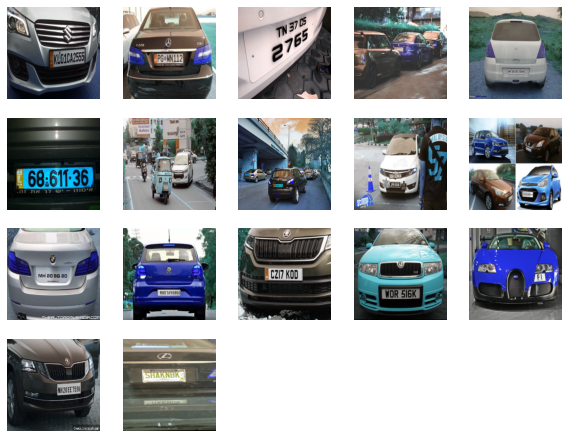

In [ ]:
plt.figure(figsize=(10,20))
for i in range(0,17) :
    plt.subplot(10,5,i+1)
    plt.axis('off')
    plt.imshow(X[i])

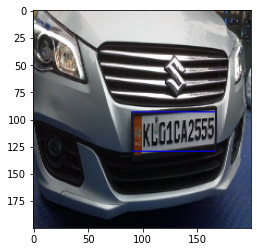

In [ ]:
image = cv2.rectangle(X[0],(y[0][0],y[0][1]),(y[0][2],y[0][3]),(0, 0, 255))
plt.imshow(image)
plt.show()

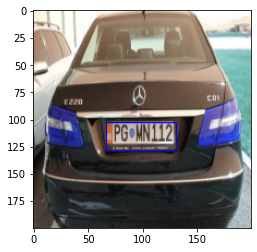

In [ ]:
image = cv2.rectangle(X[1],(y[1][0],y[1][1]),(y[1][2],y[1][3]),(0, 0, 255))
plt.imshow(image)
plt.show()

In [ ]:
X=np.array(X)
y=np.array(y)

In [ ]:
X = X / 255
y = y / 255

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [ ]:
from keras.models import Sequential

from keras.layers import Dense, Flatten

from keras.applications.vgg16 import VGG16

In [ ]:
model = Sequential()
model.add(VGG16(weights="imagenet", include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="sigmoid"))

model.layers[-6].trainable = False

model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 6, 6, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 128)               2359424   
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 4)                 260       
                                                         

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [ ]:
train = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32, verbose=1)

Epoch 1/10
13/13 [==============================] - 173s 13s/step - loss: 0.0389 - accuracy: 0.5064 - val_loss: 0.0123 - val_accuracy: 0.7273
Epoch 2/10
13/13 [==============================] - 170s 13s/step - loss: 0.0131 - accuracy: 0.6324 - val_loss: 0.0230 - val_accuracy: 0.5682
Epoch 3/10
13/13 [==============================] - 170s 13s/step - loss: 0.0116 - accuracy: 0.6401 - val_loss: 0.0096 - val_accuracy: 0.6818
Epoch 4/10
13/13 [==============================] - 171s 13s/step - loss: 0.0055 - accuracy: 0.7275 - val_loss: 0.0063 - val_accuracy: 0.6818
Epoch 5/10
13/13 [==============================] - 172s 13s/step - loss: 0.0031 - accuracy: 0.8201 - val_loss: 0.0054 - val_accuracy: 0.8409
Epoch 6/10
13/13 [==============================] - 185s 14s/step - loss: 0.0019 - accuracy: 0.8483 - val_loss: 0.0054 - val_accuracy: 0.8182
Epoch 7/10
13/13 [==============================] - 170s 13s/step - loss: 0.0014 - accuracy: 0.9229 - val_loss: 0.0041 - val_accuracy: 0.9318
Epoch 

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Score : %.2f%%" % (scores[1]*100))

Score : 84.09%


In [ ]:
def plot_scores(train) :
    accuracy = train.history['accuracy']
    val_accuracy = train.history['val_accuracy']
    epochs = range(len(accuracy))
    plt.plot(epochs, accuracy, 'b', label='Score apprentissage')
    plt.plot(epochs, val_accuracy, 'r', label='Score validation')
    plt.title('Scores')
    plt.legend()
    plt.show()

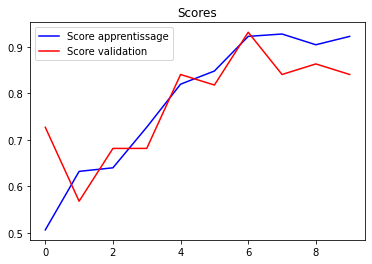

In [ ]:
plot_scores(train)

Prediction

In [ ]:
y_cnn = model.predict(X_test)

In [ ]:
y_cnn.shape

(44, 4)

In [ ]:
plt.figure(figsize=(20,40))
for i in range(0,43) :
    plt.subplot(10,5,i+1)
    plt.axis('off')
    ny = y_cnn[i]*255
    image = cv2.rectangle(X_test[i],(int(ny[0]),int(ny[1])),(int(ny[2]),int(ny[3])),(0, 255, 0))
    plt.imshow(image)



Output hidden; open in https://colab.research.google.com to view.